In [1]:
import sys
import os

sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Questão 1**

## **Dados**

In [3]:
data = pd.read_csv('../data/mnist_5.csv', header=None).values
data.shape

(6313, 784)

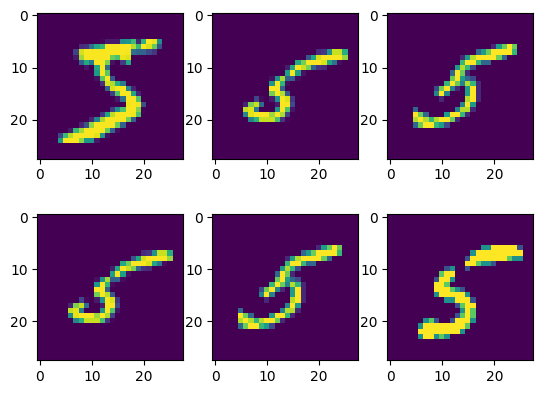

In [4]:
fig, axs = plt.subplots(2, 3)

for i in range(2):
    for j in range(3):
        example = data[i+j].reshape(28, 28)
        axs[i][j].imshow(example)

## **Modelo**

In [5]:
from amaprob.models.probabilistic_pca import PPCA

In [31]:
model = PPCA(data, 2)

In [33]:
model.fit()

In [34]:
a = model.sample()

In [35]:
a.shape

(784,)

In [36]:
a = a.reshape(28, 28)

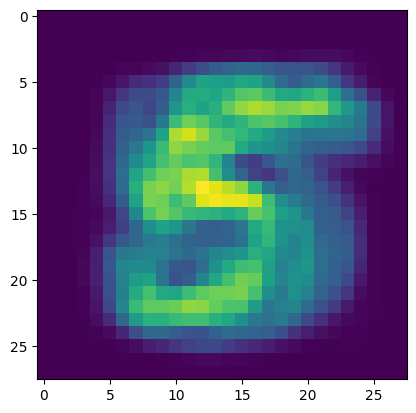

In [37]:
plt.imshow(a)